In [1]:
#importing dependencies
from pprint import pprint
import time
import requests
import pandas as pd
from config import rapidapi_key
import matplotlib.pyplot as plt
import datetime
import math
import numpy as np
import scipy.stats as st

### List of Dataframes
china_daily_df = pd.read_csv("cleaned_dataframes/china_dailyconfirmed_df.csv")

china_daily_df = pd.read_csv("cleaned_dataframes/china_dailydeaths_df.csv")

china_daily_df = pd.read_csv("cleaned_dataframes/china_dailyrecovered_df.csv")

us_daily_df = pd.read_csv("cleaned_dataframes/us_dailyconfirmed_df.csv")

us_daily_df = pd.read_csv("cleaned_dataframes/us_dailydeaths_df.csv")

us_daily_df = pd.read_csv("cleaned_dataframes/us_dailyrecovered_df.csv")

italy_daily_df = pd.read_csv("cleaned_dataframes/italy_dailyconfirmed_df.csv")

italy_daily_df = pd.read_csv("cleaned_dataframes/italy_dailydeaths_df.csv")

italy_daily_df = pd.read_csv("cleaned_dataframes/italy_dailyrecovered_df.csv")

corr_confirmed = pd.read_csv("cleaned_dataframes/S&P500_vs_confirmed.csv")

corr_deaths = pd.read_csv("cleaned_dataframes/S&P500_vs_deaths.csv")

corr_recovered = pd.read_csv("cleaned_dataframes/S&P500_vs_recovered.csv")

dji_df = pd.read_csv("cleaned_dataframes/dji_df.csv")

smp_df = pd.read_csv("cleaned_dataframes/smp_df.csv")

sse_df = pd.read_csv("cleaned_dataframes/sse_df.csv")

volatile_dji_df = pd.read_csv("cleaned_dataframes/volatile_dji_df.csv")

volatile_smp_df = pd.read_csv("cleaned_dataframes/volatile_smp_df.csv")

volatile_sse_df = pd.read_csv("cleaned_dataframes/volatile_sse_df.csv")

volatile_italy_df = pd.read_csv("cleaned_dataframes/volatile_sse_df.csv")

### From top 4
asx_df = pd.read_csv("cleaned_dataframes/asx_df.csv")

sk_df = pd.read_csv("cleaned_dataframes/sk_df.csv")

japan_df = pd.read_csv("cleaned_dataframes/japan_df.csv")

volatile_asx_df = pd.read_csv("cleaned_dataframes/volatile_asx_df.csv")

volatile_sk_df = pd.read_csv("cleaned_dataframes/volatile_sk_df.csv")

volatile_japan_df = pd.read_csv("cleaned_dataframes/volatile_japan_df.csv")


In [2]:
volatile_dji_df = pd.read_csv("cleaned_dataframes/volatile_dji_df.csv")
volatile_smp_df = pd.read_csv("cleaned_dataframes/volatile_smp_df.csv")
volatile_sse_df = pd.read_csv("cleaned_dataframes/volatile_sse_df.csv")
volatile_italy_df = pd.read_csv("cleaned_dataframes/volatile_italy_df.csv")
volatile_asx_df = pd.read_csv("cleaned_dataframes/volatile_asx_df.csv")
volatile_sk_df = pd.read_csv("cleaned_dataframes/volatile_sk_df.csv")
volatile_japan_df = pd.read_csv("cleaned_dataframes/volatile_japan_df.csv")

volatile_dji_df['Date']=pd.to_datetime(volatile_dji_df['Date'])
volatile_smp_df['Date']=pd.to_datetime(volatile_smp_df['Date'])
volatile_sse_df['Date']=pd.to_datetime(volatile_sse_df['Date'])
volatile_italy_df['Date']=pd.to_datetime(volatile_italy_df['Date'])
volatile_asx_df['Date']=pd.to_datetime(volatile_asx_df['Date'])
volatile_sk_df['Date']=pd.to_datetime(volatile_sk_df['Date'])
volatile_japan_df['Date']=pd.to_datetime(volatile_japan_df['Date'])

volatile_smp_df['X']=(volatile_smp_df['Annual Volatility']-volatile_smp_df['Annual Volatility'].min())/(volatile_smp_df['Annual Volatility'].max()-volatile_smp_df['Annual Volatility'].min())
volatile_sse_df['X']=(volatile_sse_df['Annual Volatility']-volatile_sse_df['Annual Volatility'].min())/(volatile_sse_df['Annual Volatility'].max()-volatile_sse_df['Annual Volatility'].min())
volatile_italy_df['X']=(volatile_italy_df['Annual Volatility']-volatile_italy_df['Annual Volatility'].min())/(volatile_italy_df['Annual Volatility'].max()-volatile_italy_df['Annual Volatility'].min())
volatile_dji_df['X']=(volatile_dji_df['Annual Volatility']-volatile_dji_df['Annual Volatility'].min())/(volatile_dji_df['Annual Volatility'].max()-volatile_dji_df['Annual Volatility'].min())
volatile_asx_df['X']=(volatile_asx_df['Annual Volatility']-volatile_asx_df['Annual Volatility'].min())/(volatile_asx_df['Annual Volatility'].max()-volatile_asx_df['Annual Volatility'].min())
volatile_sk_df['X']=(volatile_sk_df['Annual Volatility']-volatile_sk_df['Annual Volatility'].min())/(volatile_sk_df['Annual Volatility'].max()-volatile_sk_df['Annual Volatility'].min())
volatile_japan_df['X']=(volatile_japan_df['Annual Volatility']-volatile_japan_df['Annual Volatility'].min())/(volatile_japan_df['Annual Volatility'].max()-volatile_japan_df['Annual Volatility'].min())



In [3]:
volatile_italy_df.head()

,Unnamed: 0,Date,Annual Volatility,X
0,0,2020-03-27,29.027257,1.000000
1,1,2020-03-26,28.891433,0.991103
2,2,2020-03-25,28.877689,0.990203
3,3,2020-03-24,28.836202,0.987486
4,4,2020-03-23,27.634610,0.908779


No handles with labels found to put in legend.


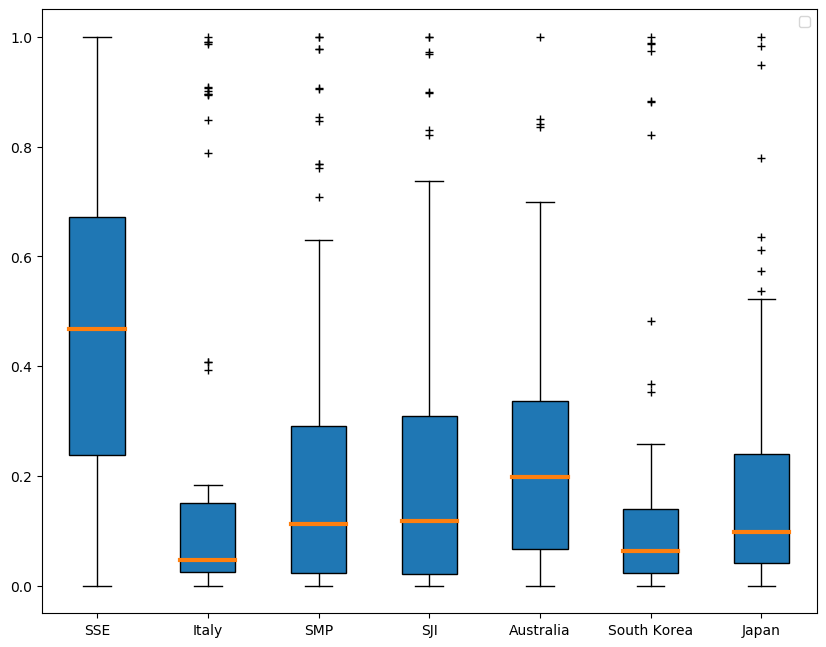

pvalue=4.673927557129442e-11


In [4]:
st.f_oneway(volatile_sse_df['X'],
            volatile_italy_df['X'],
            volatile_smp_df['X'],
            volatile_dji_df['X'],
            )

plt.figure(figsize = (10,8), dpi = 100)
plt.style.use('default')
plt.boxplot([volatile_sse_df['X'],volatile_italy_df['X'],
           volatile_smp_df['X'],volatile_dji_df['X'],
            volatile_asx_df['X'],volatile_sk_df['X'],
            volatile_japan_df['X']],labels = ["SSE","Italy","SMP","SJI","Australia","South Korea","Japan"],
           patch_artist = True, medianprops = {'linewidth':3},sym='+')

plt.ylim(-.05,1.05)
plt.legend()


plt.show()
print("pvalue=4.673927557129442e-11")

No handles with labels found to put in legend.


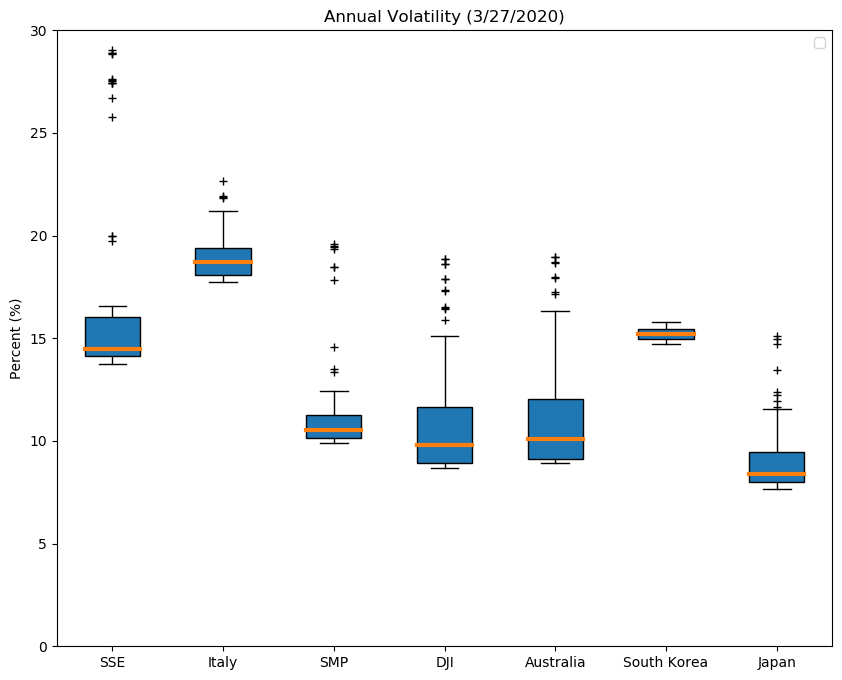

In [5]:
plt.figure(figsize = (10,8), dpi = 100)
plt.style.use('default')
plt.boxplot([
             volatile_italy_df['Annual Volatility'],
    volatile_asx_df['Annual Volatility'],
    volatile_sk_df['Annual Volatility'],
           volatile_smp_df['Annual Volatility'],
             volatile_dji_df['Annual Volatility'],
            
             
    volatile_sse_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility']],
            labels = ["SSE","Italy","SMP","DJI","Australia","South Korea","Japan"],
           patch_artist = True, medianprops = {'linewidth':3},sym='+')

plt.ylim(0,30)
plt.legend()
plt.title("Annual Volatility (3/27/2020)")
plt.ylabel("Percent (%)")
plt.savefig("figures/volatility_boxplot.png")
plt.show()

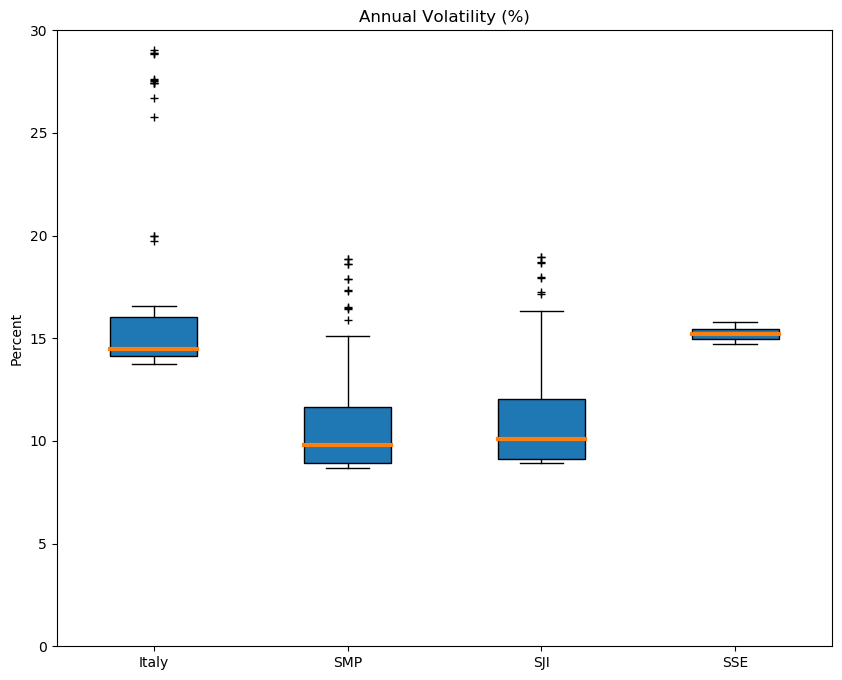

In [6]:
plt.figure(figsize = (10,8), dpi = 100)
plt.style.use('default')
plt.boxplot([volatile_italy_df['Annual Volatility'],
           volatile_smp_df['Annual Volatility'],volatile_dji_df['Annual Volatility'],volatile_sse_df['Annual Volatility']],labels = ["Italy","SMP","SJI","SSE"],
           patch_artist = True, medianprops = {'linewidth':3},sym='+')


plt.ylim(0,30)
plt.ylabel('Percent')
plt.title("Annual Volatility (%)")
plt.show()

C:\Users\chand\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


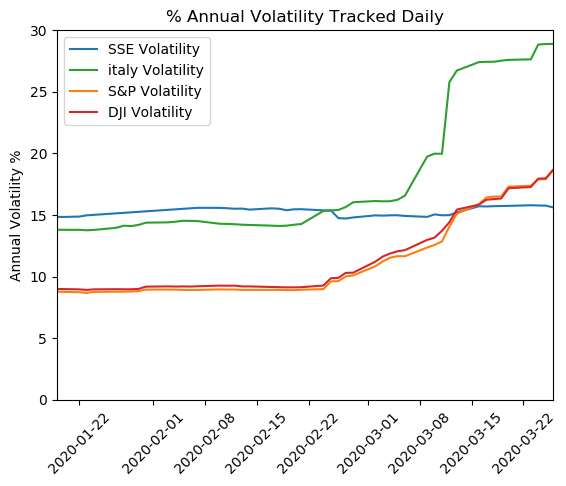

15.218486934651336
14.468981189944383
9.826121848795875
10.100695456470426
18.713463092960488
10.537143194272707
8.411614117208384


In [7]:

fig, ax1 = plt.subplots()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
color4 = 'tab:red'
color5 = 'tab:purple'
color6 = 'tab:brown'
color7 = 'tab:olive'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Annual Volatility %')
ax1.plot(volatile_sse_df['Date'],volatile_sse_df['Annual Volatility'], label = "SSE Volatility", color=color1)
ax1.plot(volatile_italy_df['Date'],volatile_italy_df['Annual Volatility'], label = "italy Volatility", color=color2)
ax1.plot(volatile_smp_df['Date'],volatile_smp_df['Annual Volatility'], label = "S&P Volatility", color=color3)
ax1.plot(volatile_dji_df['Date'],volatile_dji_df['Annual Volatility'], label = "DJI Volatility", color=color4)
#ax1.plot(volatile_asx_df['Date'],volatile_asx_df['Annual Volatility'], label = "Australia Volatility", color=color5)
#ax1.plot(volatile_sk_df['Date'],volatile_sk_df['Annual Volatility'], label = "South Korea Volatility", color=color6)
#ax1.plot(volatile_japan_df['Date'],volatile_japan_df['Annual Volatility'], label = "Japan Volatility", color=color7)


plt.legend()
plt.xticks(rotation=45)

#plt.savefig("graphs/Volatility comparison")
plt.xlim(datetime.date(2020,1,19),datetime.date(2020,3,26))
plt.ylim(0,30)
plt.title("% Annual Volatility Tracked Daily")
plt.show()
print(volatile_sse_df['Annual Volatility'].median())
print(volatile_italy_df['Annual Volatility'].median())
print(volatile_smp_df['Annual Volatility'].median())
print(volatile_dji_df['Annual Volatility'].median())
print(volatile_asx_df['Annual Volatility'].median())
print(volatile_sk_df['Annual Volatility'].median())
print(volatile_japan_df['Annual Volatility'].median())



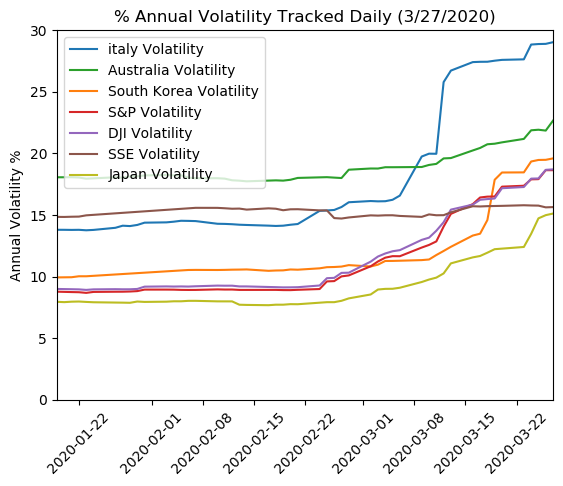

15.218486934651336
14.468981189944383
9.826121848795875
10.100695456470426
18.713463092960488
10.537143194272707
8.411614117208384


In [8]:

fig, ax1 = plt.subplots()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
color4 = 'tab:red'
color5 = 'tab:purple'
color6 = 'tab:brown'
color7 = 'tab:olive'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Annual Volatility %')
ax1.plot(volatile_italy_df['Date'],volatile_italy_df['Annual Volatility'], label = "italy Volatility", color=color1)
ax1.plot(volatile_asx_df['Date'],volatile_asx_df['Annual Volatility'], label = "Australia Volatility", color=color2)
ax1.plot(volatile_sk_df['Date'],volatile_sk_df['Annual Volatility'], label = "South Korea Volatility", color=color3)
ax1.plot(volatile_smp_df['Date'],volatile_smp_df['Annual Volatility'], label = "S&P Volatility", color=color4)
ax1.plot(volatile_dji_df['Date'],volatile_dji_df['Annual Volatility'], label = "DJI Volatility", color=color5)
ax1.plot(volatile_sse_df['Date'],volatile_sse_df['Annual Volatility'], label = "SSE Volatility", color=color6)
ax1.plot(volatile_japan_df['Date'],volatile_japan_df['Annual Volatility'], label = "Japan Volatility", color=color7)


plt.legend()
plt.xticks(rotation=45)

#plt.savefig("graphs/Volatility comparison")
plt.xlim(datetime.date(2020,1,19),datetime.date(2020,3,27))
plt.ylim(0,30)
plt.title("% Annual Volatility Tracked Daily (3/27/2020)")
plt.savefig("figures/volatility_linegraph.png")
plt.show()
print(volatile_sse_df['Annual Volatility'].median())
print(volatile_italy_df['Annual Volatility'].median())
print(volatile_smp_df['Annual Volatility'].median())
print(volatile_dji_df['Annual Volatility'].median())
print(volatile_asx_df['Annual Volatility'].median())
print(volatile_sk_df['Annual Volatility'].median())
print(volatile_japan_df['Annual Volatility'].median())



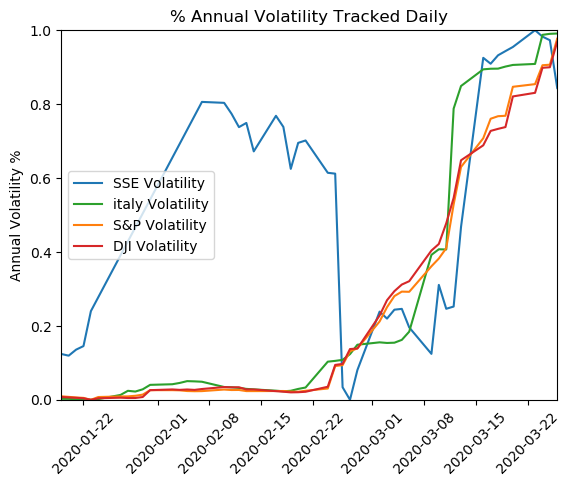

15.218486934651336
14.468981189944383
9.826121848795875
10.100695456470426
18.713463092960488
10.537143194272707
8.411614117208384


In [9]:

fig, ax1 = plt.subplots()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
color4 = 'tab:red'
color5 = 'tab:purple'
color6 = 'tab:brown'
color7 = 'tab:olive'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Annual Volatility %')
ax1.plot(volatile_sse_df['Date'],volatile_sse_df['X'], label = "SSE Volatility", color=color1)
ax1.plot(volatile_italy_df['Date'],volatile_italy_df['X'], label = "italy Volatility", color=color2)
ax1.plot(volatile_smp_df['Date'],volatile_smp_df['X'], label = "S&P Volatility", color=color3)
ax1.plot(volatile_dji_df['Date'],volatile_dji_df['X'], label = "DJI Volatility", color=color4)
#ax1.plot(volatile_asx_df['Date'],volatile_asx_df['Annual Volatility'], label = "Australia Volatility", color=color5)
#ax1.plot(volatile_sk_df['Date'],volatile_sk_df['Annual Volatility'], label = "South Korea Volatility", color=color6)
#ax1.plot(volatile_japan_df['Date'],volatile_japan_df['Annual Volatility'], label = "Japan Volatility", color=color7)


plt.legend()
plt.xticks(rotation=45)

#plt.savefig("graphs/Volatility comparison")
plt.xlim(datetime.date(2020,1,19),datetime.date(2020,3,26))
plt.ylim(0,1)
plt.title("% Annual Volatility Tracked Daily")
plt.show()
print(volatile_sse_df['Annual Volatility'].median())
print(volatile_italy_df['Annual Volatility'].median())
print(volatile_smp_df['Annual Volatility'].median())
print(volatile_dji_df['Annual Volatility'].median())
print(volatile_asx_df['Annual Volatility'].median())
print(volatile_sk_df['Annual Volatility'].median())
print(volatile_japan_df['Annual Volatility'].median())



Normalizing by Median

In [10]:
volatile_japan_df['Annual Volatility'].median()

8.411614117208384

In [11]:
st.f_oneway(volatile_sse_df['Annual Volatility'],
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
            volatile_asx_df['Annual Volatility'],
            volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility'])

F_onewayResult(statistic=132.16218739320453, pvalue=1.452459210778732e-102)

In [12]:
st.f_oneway(
            volatile_italy_df['X'],
            volatile_smp_df['X'],
            volatile_dji_df['X'],
            volatile_asx_df['X'],
            volatile_sk_df['X'],
            volatile_japan_df['X'])

F_onewayResult(statistic=1.0431378500237247, pvalue=0.3915737899789176)

In [13]:
st.f_oneway(volatile_sse_df['Annual Volatility'],
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
           
            volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility'])

F_onewayResult(statistic=73.70747677580508, pvalue=1.3206002609741771e-56)

In [14]:
st.f_oneway(
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
         
            volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility'])

F_onewayResult(statistic=60.97794528173, pvalue=7.472699780628854e-40)

In [15]:
st.f_oneway(
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
         
            )

F_onewayResult(statistic=58.04281891537638, pvalue=2.6544923578081865e-21)

In [16]:
st.f_oneway(volatile_sse_df['X'],
            volatile_italy_df['X'],
            volatile_smp_df['X'],
            volatile_dji_df['X'],
            )

F_onewayResult(statistic=13.866699223365604, pvalue=1.6140172092050044e-08)

In [17]:
st.f_oneway(
            volatile_italy_df['X'],
            volatile_smp_df['X'],
            volatile_dji_df['X'],
            )

F_onewayResult(statistic=0.7724380518463836, pvalue=0.46302565707149423)

In [18]:
st.f_oneway(
            
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
         
            )

F_onewayResult(statistic=0.30290456954789935, pvalue=0.5828253064605584)

In [19]:
volatile_sse_df['Annual Volatility'] = volatile_sse_df['Annual Volatility']/volatile_sse_df['Annual Volatility'].mean()
volatile_italy_df['Annual Volatility'] = volatile_italy_df['Annual Volatility']/volatile_italy_df['Annual Volatility'].mean()
volatile_smp_df['Annual Volatility'] = volatile_smp_df['Annual Volatility']/volatile_smp_df['Annual Volatility'].mean()
volatile_dji_df['Annual Volatility'] = volatile_dji_df['Annual Volatility']/volatile_dji_df['Annual Volatility'].mean()
volatile_asx_df['Annual Volatility'] = volatile_asx_df['Annual Volatility']/volatile_asx_df['Annual Volatility'].mean()
volatile_sk_df['Annual Volatility'] = volatile_sk_df['Annual Volatility']/volatile_sk_df['Annual Volatility'].mean()
volatile_japan_df['Annual Volatility'] = volatile_japan_df['Annual Volatility']/volatile_japan_df['Annual Volatility'].mean()

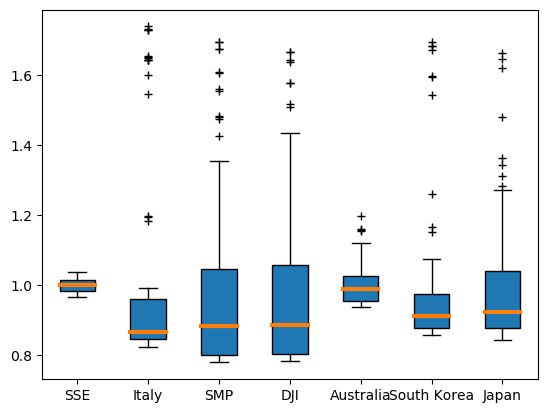

In [20]:
plt.boxplot([volatile_sse_df['Annual Volatility'],volatile_italy_df['Annual Volatility'],
           volatile_smp_df['Annual Volatility'],volatile_dji_df['Annual Volatility'],
            volatile_asx_df['Annual Volatility'],volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility']],labels = ["SSE","Italy","SMP","DJI","Australia","South Korea","Japan"],
           patch_artist = True, medianprops = {'linewidth':3},sym='+')
plt.show()

In [21]:
st.f_oneway(volatile_sse_df['Annual Volatility'],
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
            volatile_asx_df['Annual Volatility'],
            volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility'])
#pvalue=1.7574918057142648e-05 norm by /median
#pvalue=2.0785898669327105e-06 norm by -median

F_onewayResult(statistic=1.054051154983257e-28, pvalue=1.0)

In [22]:
st.f_oneway(volatile_sse_df['Annual Volatility'],
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
            
            volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility'])
#pvalue=0.0022410380954613835 norm by /median
#pvalue=0.00012364329419093346 norm by -median

F_onewayResult(statistic=1.0858667520946496e-28, pvalue=1.0)

In [23]:
st.f_oneway(
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
            
            volatile_sk_df['Annual Volatility'],
            volatile_japan_df['Annual Volatility'])

F_onewayResult(statistic=5.811239916014419e-29, pvalue=1.0)

In [24]:
st.f_oneway(volatile_sse_df['Annual Volatility'],
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
            )
#pvalue=0.0009264141485861998 normalized by /median
#pvalue=0.00024610941927449056 norm by - median

F_onewayResult(statistic=1.657778805940223e-28, pvalue=1.0)

In [25]:
st.f_oneway(
            volatile_italy_df['Annual Volatility'],
            volatile_smp_df['Annual Volatility'],
            volatile_dji_df['Annual Volatility'],
            )
#pvalue=0.9007008944054888 normalized by /median
#pvalue=0.18281543253232002 norm by - median

F_onewayResult(statistic=9.690277329288293e-29, pvalue=1.0)